**Гервиц Виктория Александровна, 316** <br>

Данные взяты с kaggle: https://www.kaggle.com/datasets/dwdkills/alcohol-consumption-in-russia.

Таблица содержит данные о продаже различной алкогольной продукции (вино, пиво, водка, шампанское, бренди), указанной в литрах на душу населения, в регионах России в 1998-2016 годах.

В отчёте буду вместо "Продаж/количества алкоголя на душу населения" писать "Продажи/количество алкоголя" (для краткости).

Подключим необходимые библиотеки:


In [1]:
#python

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random
from scipy.stats import kstest
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import cramervonmises
from statsmodels.stats.diagnostic import lilliefors


!pip install outlier_utils

In [2]:
#python

pd.options.mode.chained_assignment = None


In [3]:
%load_ext rpy2.ipython

In [4]:
#R

%%R
oldw <- getOption("warn")
options(warn = -1)

install.packages("dplyr")
install.packages("ggplot2")
install.packages("envoutliers")
install.packages("wesanderson")
install.packages("outliers")
install.packages("nortest")
install.packages("mice")

library(wesanderson)
library(outliers)
library(nortest)
library(dplyr)
library(ggplot2)
library(mice)

(as ‘lib’ is unspecified)







	‘/tmp/RtmpYWr736/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpYWr736/downloaded_packages’

(as ‘lib’ is unspecified)


















































































































	‘/tmp/RtmpYWr736/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpYWr736/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpYWr736/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpYWr736/downloaded_packages’

(as ‘lib’ is unspecified)






















































	‘/tmp/RtmpYWr736/downloaded_packages’

Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union


Attaching package: ‘mice’



    filter



    cbind, rbind




Посмотрим на выбранный датафрэйм: считаем данные из файла и уберём пустые строки.

In [5]:
#python

data_frame = pd.read_csv('russia_alcohol.csv')
data_frame = data_frame.dropna().reset_index(drop = True)
data_frame

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2
...,...,...,...,...,...,...,...
1544,2016,Chuvash Republic,5.0,42.3,7.7,0.7,0.4
1545,2016,Chukotka Autonomous Okrug,3.9,34.0,11.6,1.8,1.1
1546,2016,Sakha (Yakutia) Republic,4.3,56.1,8.2,1.8,0.5
1547,2016,Yamalo-Nenets Autonomous Okrug,4.5,75.8,8.2,1.7,1.3


In [6]:
#R

%%R

filter_data = function(data_frame, column, value){
  dplyr::filter(data_frame, !!as.symbol(column) == value)
}

data_frame <- read.csv('russia_alcohol.csv')
data_frame <- na.omit(data_frame)
rownames(data_frame) <- NULL
data_frame

     year                                region  wine   beer vodka champagne
1    1998                    Republic of Adygea  1.90   8.80  3.40      0.30
2    1998                            Altai Krai  3.30  19.20 11.30      1.10
3    1998                           Amur Oblast  2.10  21.20 17.30      0.70
4    1998                    Arkhangelsk Oblast  4.30  10.60 11.70      0.40
5    1998                      Astrakhan Oblast  2.90  18.00  9.50      0.80
6    1998             Republic of Bashkortostan  1.80  17.50 10.70      0.90
7    1998                       Belgorod Oblast  3.40  23.00 10.80      0.90
8    1998                        Bryansk Oblast  3.40  32.40  9.70      0.50
9    1998                  Republic of Buryatia  1.10   8.80 15.80      0.90
10   1998                       Vladimir Oblast  1.50  16.60 16.80      0.50
11   1998                      Volgograd Oblast  2.90  27.90 12.90      1.50
12   1998                        Vologda Oblast  3.90  23.70 19.30      0.60

**1. Аппроксимация распределения данных с помощью ядерных оценок.**


Ядерная оценка плотности  — это непараметрический способ оценки плотности случайной величины. Ядерная оценка плотности является задачей сглаживания данных, когда делается заключение о совокупности, основываясь на конечных выборках данных.

Для построения ядерных оценок используем информацию по продаже пива за 2003 год.

Построим график плотности распределения по продаже пива по регионам.

Text(0.5, 1.0, 'distribution density of beer sales in 2003')

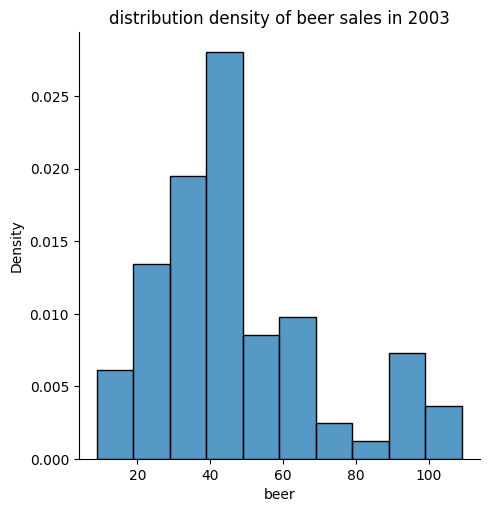

In [58]:
#python
sns.displot(x = "beer", data = data_frame[data_frame['year']==2003], stat = "density" )
plt.title("distribution density of beer sales in 2003")

Реализуем аппроксимацию при помощи ядерных оценок.

Text(0.5, 1.0, 'approximation of the density of beer sales in 2003')

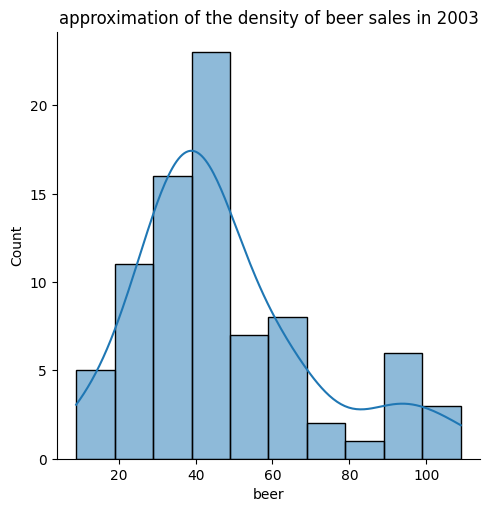

In [60]:
#python
sns.displot(x = "beer", data = data_frame[data_frame['year']==2003], kde = True)
plt.title('approximation of the density of beer sales in 2003')

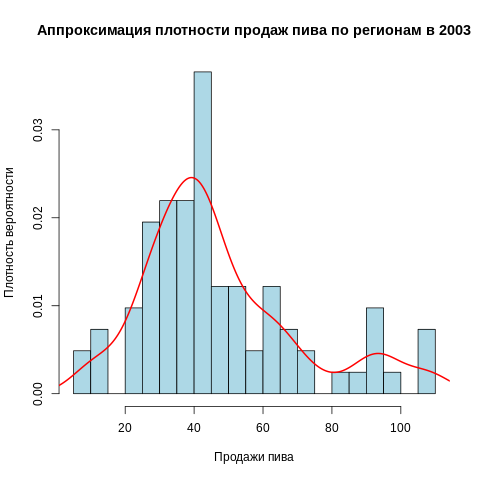

In [59]:
#R
%%R
year = filter_data(data_frame, 'year', '2003')
beer <- year$beer
hist(beer, breaks = 20, freq = FALSE, col = "lightblue",
      xlab = "Продажи пива",
      ylab = "Плотность вероятности",
      main = "Аппроксимация плотности продаж пива по регионам в 2003")
 lines(density(beer), col = "red", lwd = 2)


**2. Реализовать анализ данных с помощью cdplot, dotchart, boxplot и stripchart.**

**cdplot**

Для удобства и наглядности рассмотрим данные за 20 век (1998-2000).

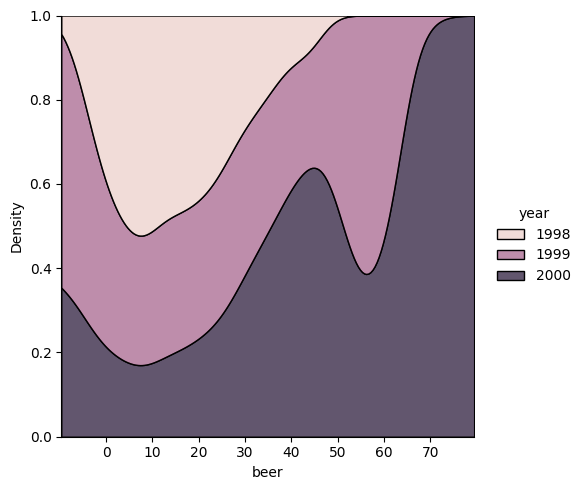

In [10]:
#python
#data_frame.index[data_frame['year'] == 2000].tolist()

df0 = data_frame.iloc[:242]
sns.displot(data = df0, x = 'beer', hue = 'year', multiple="fill", kind="kde")
plt.title()



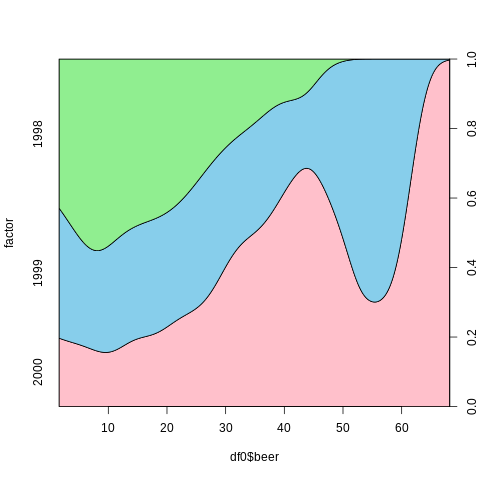

In [11]:
%%R

df0 <- data_frame[1:242, ]
df0$factor <- factor(df0$year)
cdplot(factor ~ df0$beer, col = c("pink", "skyblue", "lightgreen"), df0)

Достаточно сильно выделяются продажи за 2000 год, что показывает, что самые большие продажи пива были в том году.

**Dotchart (scatter)**

Рассмотрим продажи шампанского в Алтайском крае за все года.

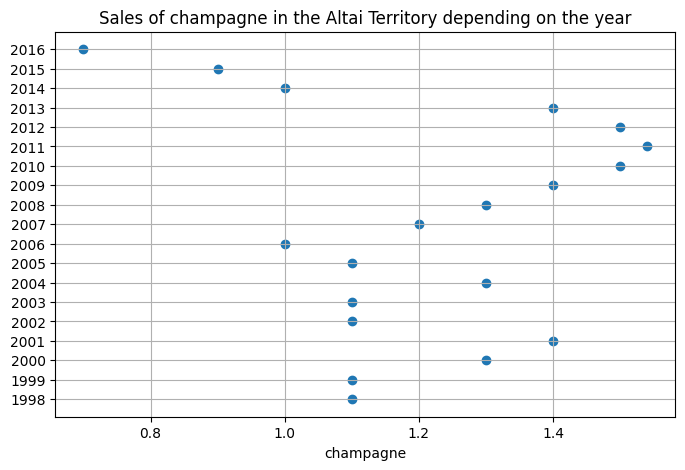

In [169]:
#python

plt.figure(figsize=(8, 5))
dfa = data_frame[data_frame['region'] == 'Altai Krai']
plt.scatter(dfa['champagne'].tolist(), dfa['year'].tolist())
plt.grid(True)
plt.title('Sales of champagne in the Altai Territory depending on the year')
plt.xlabel("champagne")
plt.yticks(dfa['year'].tolist())
plt.show()


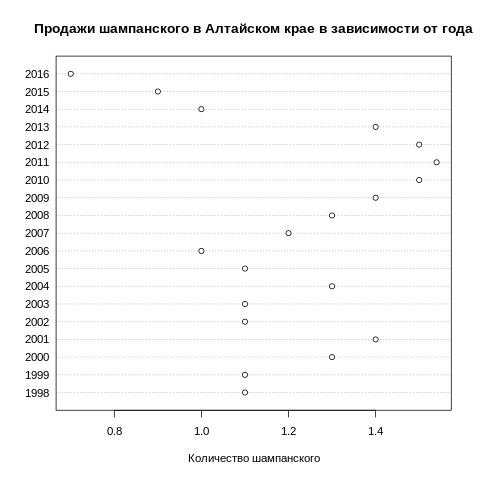

In [145]:
%%R
df5 = filter_data(data_frame, 'region', 'Altai Krai')
dotchart(df5$champagne, labels = df5$year,
         main="Продажи шампанского в Алтайском крае в зависимости от года",
         xlab="Количество шампанского", cex = 0.95)

График наглядно показывает, что в 2014 году продажи шампанского в Алтайском крае резко упали и были минимальными за всё время в 2016. Максиимальные продажи были в 2011 году.

**boxplot**

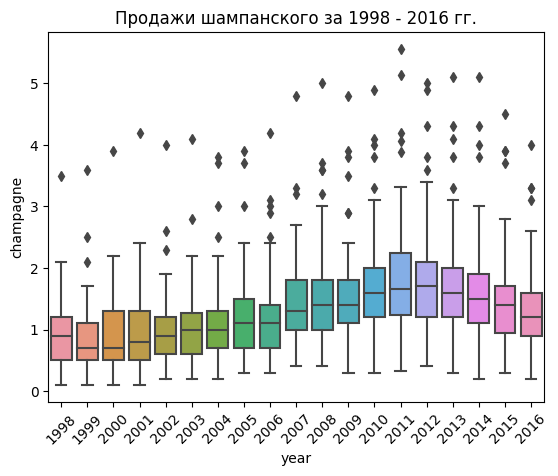

In [14]:
#python

sns.boxplot(data = data_frame, x = "year", y = 'champagne')
plt.xticks(rotation=45)
plt.title('Продажи шампанского за 1998 - 2016 гг.')
plt.show()

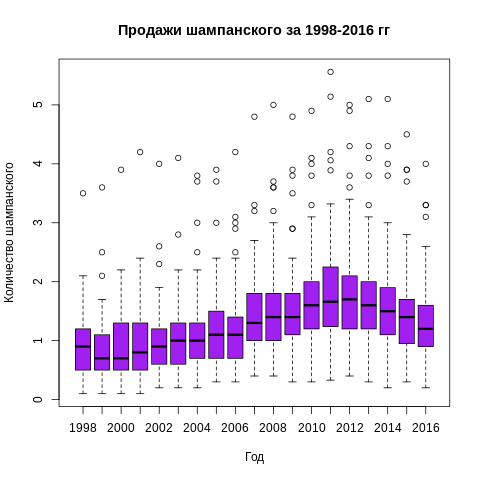

In [15]:
%%R
boxplot(champagne ~ year,
        xlab = "Год",
        ylab = "Количество шампанского",
        main = "Продажи шампанского за 1998-2016 гг",
        data = data_frame, col = 'purple')

Точки или линию, соответствующую некоторой мере центральной тенденции в данных, окружает прямоугольник ("ящик"), длина которого соответствует определенному показателю разброса. Прямые линии, исходящие из ящика, называются «усами» и используются для обозначения степени разброса (дисперсии) за пределами верхнего и нижнего квартилей. Выбросы иногда отображаются в виде отдельных точек, находящихся на одной линии с усами.

Наибольший разброс данных в 2011 году, наименьший - в 2002 и 2004 годах, соответсвенно по всей стране покупали наиболее разное количество шампанского в регионах в 2011, примерно одинаковое - в 2002 и 2004.

**Stripchart (stripplot)**

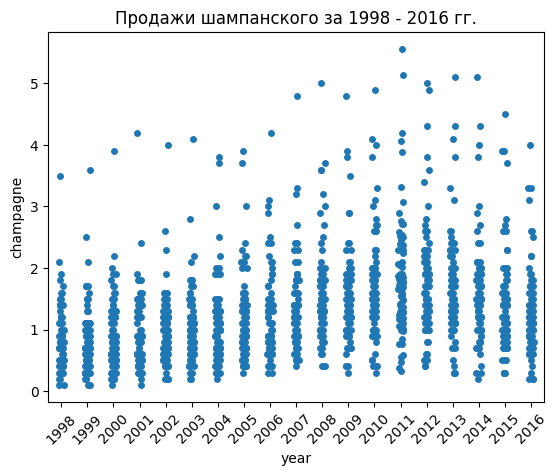

In [16]:
#python
sns.stripplot(data = data_frame, x = "year", y = "champagne")
plt.xticks(rotation=45)
plt.title('Продажи шампанского за 1998 - 2016 гг.')
plt.show()

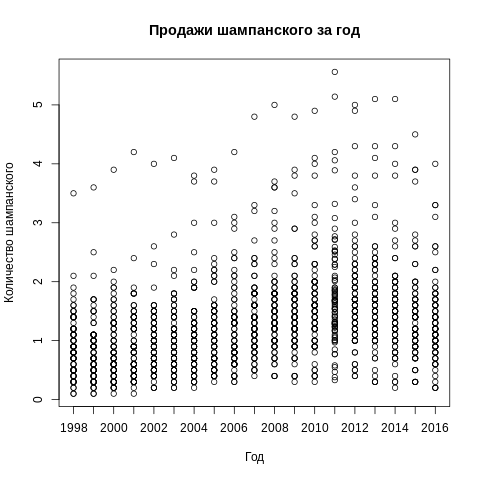

In [17]:
%%R

stripchart(data_frame$champagne ~ data_frame$year,
           main="Продажи шампанского за год",
           ylab = "Количество шампанского",
           xlab = "Год",
           vertical = TRUE,
           pch = 1)

Таким образом, значения от продажи шампанского колеблются в основном между 0 и 2.5 л. Из графика наибольшее количество данных для анализа было получено в 2011 году, причём этот год был единственным, где продажи шампанского превысили 5 л на человека.

**3. Проверить, являются ли наблюдения выбросами с точки зрения формальных статистических критериев Граббса и Q-теста Диксона. Визуализировать результаты.**

Критерий Граббса позволяет определить, является ли наибольшее или наименьшее значение в наборе данных выбросом. Он обнаруживает по одному выбросу за раз (максимальное или минимальное значение), поэтому нулевая и альтернативная гипотезы проверки максимального значения выглядит так:

H₀: Наивысшее значение не является выбросом

H₁: Наивысшее значение является выбросом

А минимального — так:

H₀: Наименьшее значение не является выбросом

H₁: Наименьшее значение является выбросом

Как и в любом статистическом тесте, если значение P меньше порогового уровня статистической значимости (обычно α = 0.05), то нулевая гипотеза отвергается, и мы приходим к выводу, что наименьшее/наибольшее значение является отклонением. Напротив, если значение P больше или равно пороговому уровню значимости, нулевая гипотеза не отвергается, и мы делаем вывод, что на основе данных о том, что наименьшее / наибольшее значение не является выбросом.

Проведём анализ, основываясь на данных по продажам вина за 1998 год.

In [174]:
#python

from outliers import smirnov_grubbs as grubbs

df1998 = data_frame[data_frame['year'] ==  1998].reset_index(drop = True)
print("Значения выбросов: ", grubbs.max_test_outliers(df1998['wine'], alpha = 0.05))
print("Индексы выбросов: ", grubbs.max_test_indices(df1998['wine'], alpha = 0.05))

Значения выбросов:  [8.8, 8.5]
Индексы выбросов:  [63, 28]


In [149]:
%%R

df1 = filter_data(data_frame, 'year', '1998')
wine <- df1$wine
print(grubbs.test(wine))
print(grubbs.test(wine, opposite = TRUE))


	Grubbs test for one outlier

data:  wine
G = 3.42296, U = 0.85171, p-value = 0.01561
alternative hypothesis: highest value 8.8 is an outlier


	Grubbs test for one outlier

data:  wine
G = 1.61921, U = 0.96682, p-value = 1
alternative hypothesis: lowest value 0.3 is an outlier



В реализации на R видно, что значение меньше 0.05 только для 1ого теста, поэтому принимается гипотеза6 что там есть выброс.

Видно, что реализация на R помогает найти выбросы только на концах, в то время как на python это всевозможные выбросы. Далее будем рассматривать максимальное из этих значений выбросов-8.8

**Q-тест Диксона**

Тест Диксона наиболее полезен для выборки небольшого объема (обычно когда n <= 30).

In [175]:
print(len(df1998))

81


Реализации на python теста Диксона нет, поэтому возьмём уже готовую из интернета.

In [176]:
#python

def dixon_test(data):
    sdata = sorted(data)
    Q_maxdiff = 0
    Q_max = abs((sdata[-2] - sdata[-1]))
    Q_max /= abs((sdata[0] - sdata[-1]))
    Q_maxdiff = Q_max - 0.29
    if Q_maxdiff > 0:
        return True
    else:
        return False


df2 = df1998.iloc[51:80]
dixon_test(df2['wine'])


True

In [152]:
%%R

wine <- df1$wine[51:80]
dixon.test(wine)


	Dixon test for outliers

data:  wine
Q = 0.47297, p-value = 0.01347
alternative hypothesis: highest value 8.8 is an outlier



Python: был зафиксирован выброс.
R: значение p-value меньше 0.05, следовательно выброс есть.

Таким образом, все тесты показали, что 8.8 является выбросом.

**Визуализация**

Покажем наглядно с помощью графика, что 8.8 является выбросом. Оно выбивается из остальной выборки.

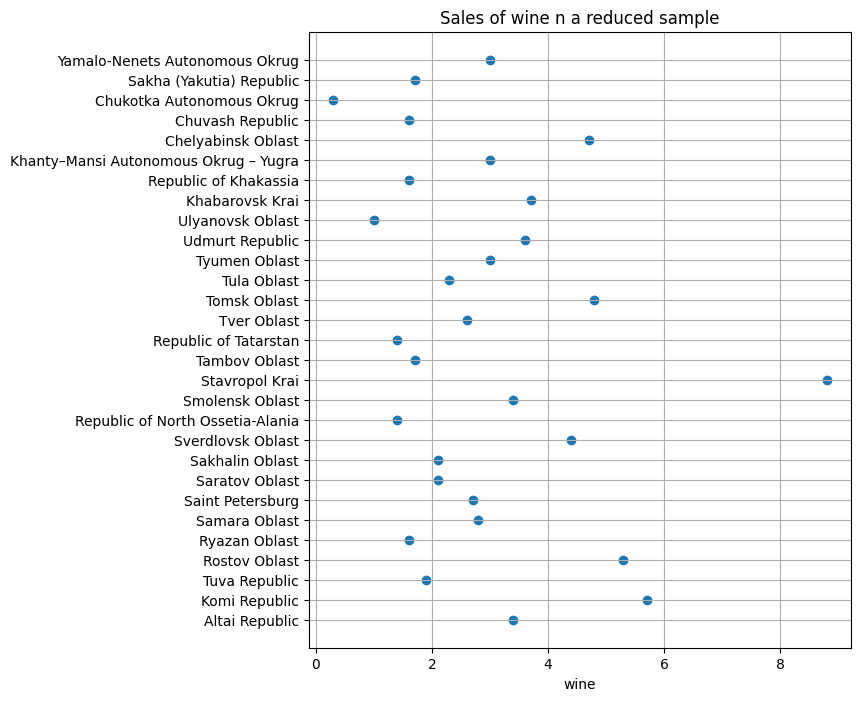

In [191]:
#python

plt.figure(figsize=(7, 8))
plt.scatter(df2['wine'].tolist(), df2['region'].tolist())
plt.grid(True)
plt.title('Sales of wine n a reduced sample')
plt.xlabel("wine")
plt.show()



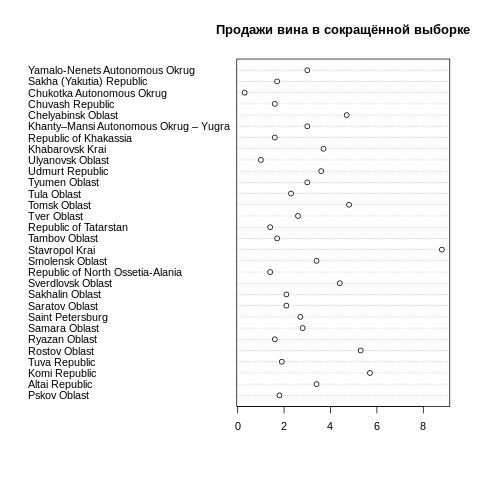

In [24]:
%%R

dotchart(df1$wine[51:80], labels = df1$region[51:80], main = 'Продажи вина в сокращённой выборке',
         cex = 0.9)

**4. Воспользоваться инструментами для заполнения пропусков в данных. Пропуски внести вручную и сравнить результаты заполнения с истинными значениями.**

*РЕАЛИЗАЦИЯ НА PYTHON*

Для наглядности используем первые 30 строк таблицы.

In [25]:
df3 = data_frame.head(30)
df3

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.10
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.10
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.40
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.30
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.20
5,1998,Republic of Bashkortostan,1.8,17.5,10.7,0.9,0.20
6,1998,Belgorod Oblast,3.4,23.0,10.8,0.9,0.10
7,1998,Bryansk Oblast,3.4,32.4,9.7,0.5,0.10
8,1998,Republic of Buryatia,1.1,8.8,15.8,0.9,0.10
9,1998,Vladimir Oblast,1.5,16.6,16.8,0.5,0.10


А теперь удалим несколько значений, предварительно вывев их изначальные значения.



In [26]:
print(df3.loc[1,'wine'])
df3.loc[1,'wine'] = np.nan

print(df3.loc[6,'beer'])
df3.loc[6,'beer'] = np.nan

print(df3.loc[13,'vodka'])
df3.loc[13,'vodka'] = np.nan

print(df3.loc[22,'champagne'])
df3.loc[22,'champagne'] = np.nan

print(df3.loc[29,'brandy'])
df3.loc[29,'brandy'] = np.nan

df3

3.3
23.0
2.0
0.8
0.3


,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.10
1,1998,Altai Krai,NaN,19.2,11.3,1.1,0.10
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.40
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.30
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.20
5,1998,Republic of Bashkortostan,1.8,17.5,10.7,0.9,0.20
6,1998,Belgorod Oblast,3.4,NaN,10.8,0.9,0.10
7,1998,Bryansk Oblast,3.4,32.4,9.7,0.5,0.10
8,1998,Republic of Buryatia,1.1,8.8,15.8,0.9,0.10
9,1998,Vladimir Oblast,1.5,16.6,16.8,0.5,0.10


Способ 1. Заполнение пропусков с помощью среднего значения.

In [27]:
df3['wine'].fillna(df3['wine'].mean(), inplace = True)
df3['beer'].fillna(df3['beer'].mean(), inplace = True)
df3['vodka'].fillna(df3['vodka'].mean(), inplace = True)
df3['champagne'].fillna(df3['champagne'].mean(), inplace = True)
df3['brandy'].fillna(df3['brandy'].mean(), inplace = True)

print(df3['wine'][1])
print(df3['beer'][6])
print(df3['vodka'][13])
print(df3['champagne'][22])
print(df3['brandy'][29])


2.9551724137931035
17.55862068965517
12.951724137931036
0.6965517241379309
0.1993103448275862


Способ 2. Заполнение пропусков с помощью медианных значений.

In [28]:
df3.loc[1,'wine'] = np.nan
df3.loc[6,'beer'] = np.nan
df3.loc[13,'vodka'] = np.nan
df3.loc[22,'champagne'] = np.nan
df3.loc[29,'brandy'] = np.nan

df3['wine'].fillna(df3['wine'].median(), inplace = True)
df3['beer'].fillna(df3['beer'].median(), inplace = True)
df3['vodka'].fillna(df3['vodka'].median(), inplace = True)
df3['champagne'].fillna(df3['champagne'].median(), inplace = True)
df3['brandy'].fillna(df3['brandy'].median(), inplace = True)

print(df3.loc[1,'wine'])
print(df3.loc[6,'beer'])
print(df3.loc[13,'vodka'])
print(df3.loc[22,'champagne'])
print(df3.loc[29,'brandy'])

2.7
18.3
12.8
0.7
0.2


Сравнение полученных данных

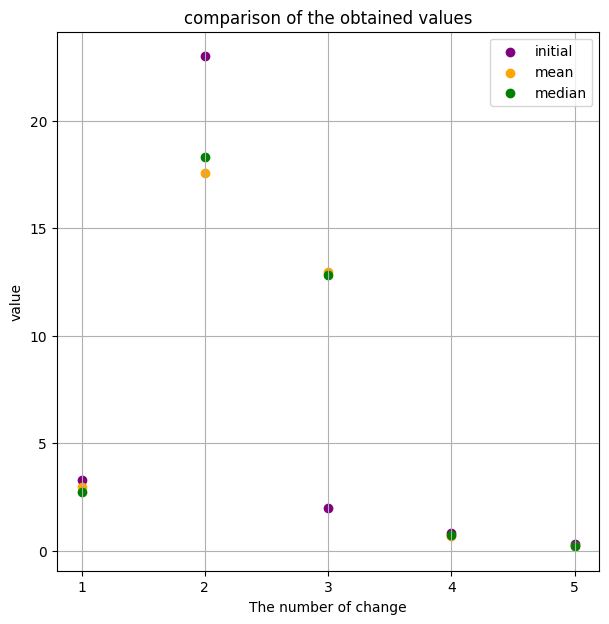

In [158]:
arr = np.array([3.3, 23.0, 2.0, 0.8, 0.3])
arr_mean = np.array([2.9551724137931035,
17.55862068965517,
12.951724137931036,
0.6965517241379309,
0.1993103448275862])
arr_median = np.array([2.7, 18.3, 12.8, 0.7, 0.2])
index = [1, 2, 3, 4, 5]

plt.figure(figsize = (7, 7))
plt.scatter(x = index, y = arr, color = 'purple')
plt.scatter(x = index, y = arr_mean, color = 'orange')
plt.scatter(x = index, y = arr_median, color = 'green')
plt.title('comparison of the obtained values')
#plt.loglog()
plt.xticks(index)
plt.xlabel('The number of change')
plt.ylabel('value')
plt.legend(('initial','mean', 'median'))
plt.grid(True)
plt.show()

Видно, что оба метода выдают достаточно близкие друг к другу значения. Отклонение по сравнению с исходными данными в обоих случаях оказалось примерно одинаковым для каждого значения. в целом методы выдают непостоянное отклонение и дают значение иногда близкое к исходным данным, а иногда нет.

*РЕАЛИЗАЦИЯ НА R*

In [29]:
%%R

df3 <- data_frame[1:30,]

print(df3$wine[2])
print(df3$beer[7])
print(df3$vodka[14])
print(df3$champagne[21])
print(df3$brandy[25])

[1] 3.3
[1] 23
[1] 2
[1] 0.3
[1] 0.2


In [30]:
%%R

df3$wine[2] = NA
df3$beer[7] = NA
df3$vodka[14] = NA
df3$champagne[21] = NA
df3$brandy[25] = NA

df3

   year                     region wine beer vodka champagne brandy
1  1998         Republic of Adygea  1.9  8.8   3.4       0.3   0.10
2  1998                 Altai Krai   NA 19.2  11.3       1.1   0.10
3  1998                Amur Oblast  2.1 21.2  17.3       0.7   0.40
4  1998         Arkhangelsk Oblast  4.3 10.6  11.7       0.4   0.30
5  1998           Astrakhan Oblast  2.9 18.0   9.5       0.8   0.20
6  1998  Republic of Bashkortostan  1.8 17.5  10.7       0.9   0.20
7  1998            Belgorod Oblast  3.4   NA  10.8       0.9   0.10
8  1998             Bryansk Oblast  3.4 32.4   9.7       0.5   0.10
9  1998       Republic of Buryatia  1.1  8.8  15.8       0.9   0.10
10 1998            Vladimir Oblast  1.5 16.6  16.8       0.5   0.10
11 1998           Volgograd Oblast  2.9 27.9  12.9       1.5   0.30
12 1998             Vologda Oblast  3.9 23.7  19.3       0.6   0.30
13 1998            Voronezh Oblast  1.3 19.0  14.2       1.2   0.10
14 1998       Republic of Dagestan  4.8  3.8    

In [31]:
%%R

temp <- mice(df3, seed = 23000)
temp1 <- complete(temp, action = 3)

print("Новые значения пропусков")
print(temp1$wine[2])
print(temp1$beer[7])
print(temp1$vodka[14])
print(temp1$champagne[21])
print(temp1$brandy[25])


 iter imp variable
  1   1  wine  beer  vodka  champagne  brandy
  1   2  wine  beer  vodka  champagne  brandy
  1   3  wine  beer  vodka  champagne  brandy
  1   4  wine  beer  vodka  champagne  brandy
  1   5  wine  beer  vodka  champagne  brandy
  2   1  wine  beer  vodka  champagne  brandy
  2   2  wine  beer  vodka  champagne  brandy
  2   3  wine  beer  vodka  champagne  brandy
  2   4  wine  beer  vodka  champagne  brandy
  2   5  wine  beer  vodka  champagne  brandy
  3   1  wine  beer  vodka  champagne  brandy
  3   2  wine  beer  vodka  champagne  brandy
  3   3  wine  beer  vodka  champagne  brandy
  3   4  wine  beer  vodka  champagne  brandy
  3   5  wine  beer  vodka  champagne  brandy
  4   1  wine  beer  vodka  champagne  brandy
  4   2  wine  beer  vodka  champagne  brandy
  4   3  wine  beer  vodka  champagne  brandy
  4   4  wine  beer  vodka  champagne  brandy
  4   5  wine  beer  vodka  champagne  brandy
  5   1  wine  beer  vodka  champagne  brandy
  5   2  wine 

Сравнение полученных данных:

3.3  23  2  0.3  0.2
2.3  19  5  0.2  0.1

Тут и без графика видно, что метод выдаёт непостоянное отклонение, и в некоторых значениях показывает близкие результаты по сравнению с исходными, а в некоторых нет.

**5. Сгенерировать данные из нормального распределения с различными параметрами и провести анализ с помощью графиков эмпирических функций распределений, квантилей, метода огибающих, а также стандартных процедур проверки гипотез о нормальности (критерии Колмогорова-Смирнова, ШапироУилка, Андерсона-Дарлинга, Крамера фон Мизеса, Колмогорова-Смирнова в модификации Лиллиефорса и Шапиро-Франсия). Рассмотреть выборки малого (не более 50-100 элементов) и умеренного (1000-5000 наблюдений) объемов.**

Сгенерируем данные из нормального распределения:

In [32]:
#python

random.seed(322)

data1 = np.random.normal(0, 1, size = 5000)
data2 = np.random.normal(0, 1, size = 50)
data3 = np.random.normal(12, 5, size = 5000)
data4 = np.random.normal(12, 5, size = 50)
data5 = np.random.normal(3, 9, size = 5000)
data6 = np.random.normal(3, 9, size = 50)

In [33]:
%%R

set.seed(123)

data1 = rnorm(5000, 0, 1)
data2 = rnorm(50, 0, 1)
data3 = rnorm(5000, 12, 5)
data4 = rnorm(50, 12, 5)
data5 = rnorm(5000, 3, 9)
data6 = rnorm(50, 3, 9)


Эмперирческие функции распрделения

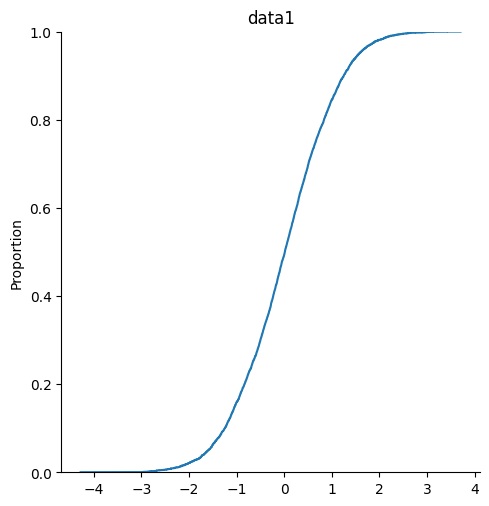

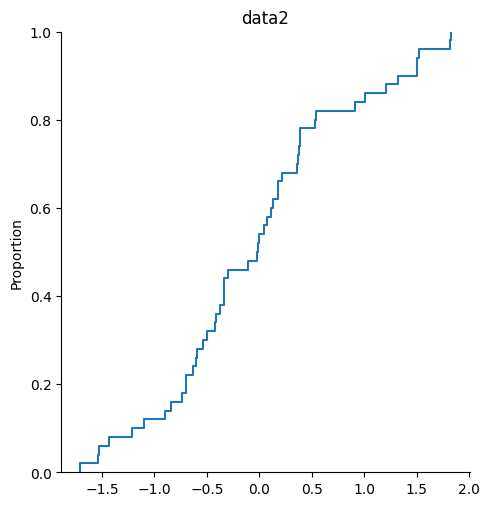

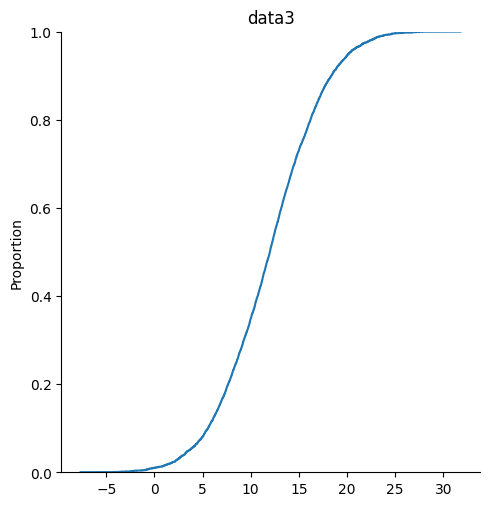

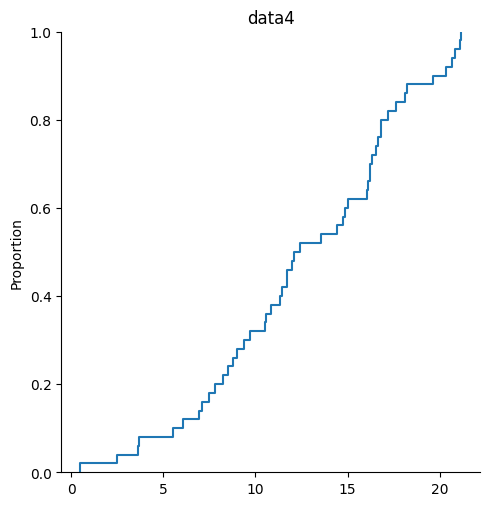

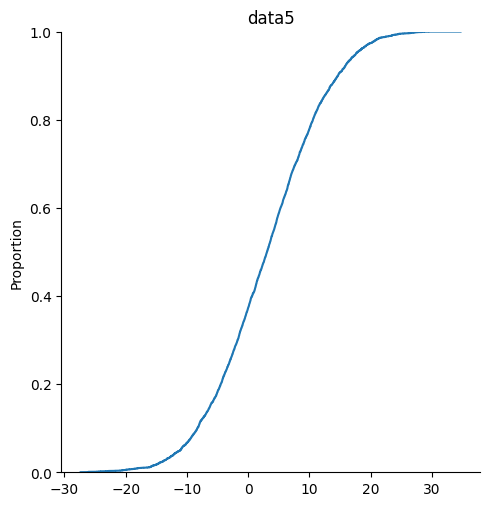

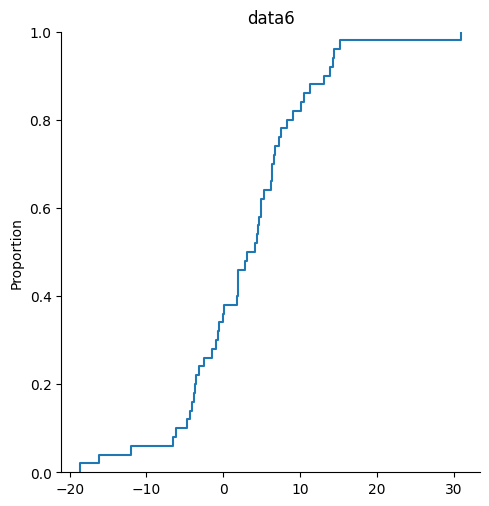

In [34]:
#python
sns.displot(data=data1, kind="ecdf").set(title='data1')
sns.displot(data=data2, kind="ecdf").set(title='data2')
sns.displot(data=data3, kind="ecdf").set(title='data3')
sns.displot(data=data4, kind="ecdf").set(title='data4')
sns.displot(data=data5, kind="ecdf").set(title='data5')
sns.displot(data=data6, kind="ecdf").set(title='data6')

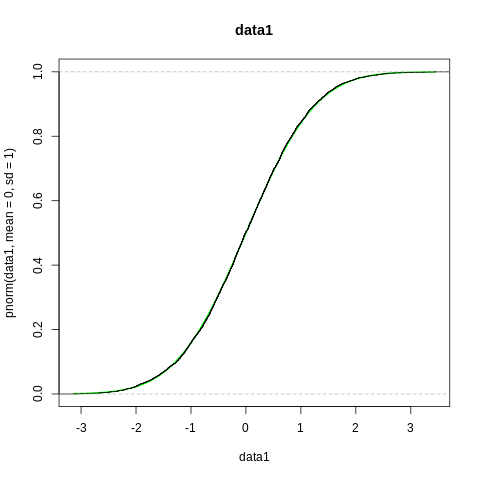

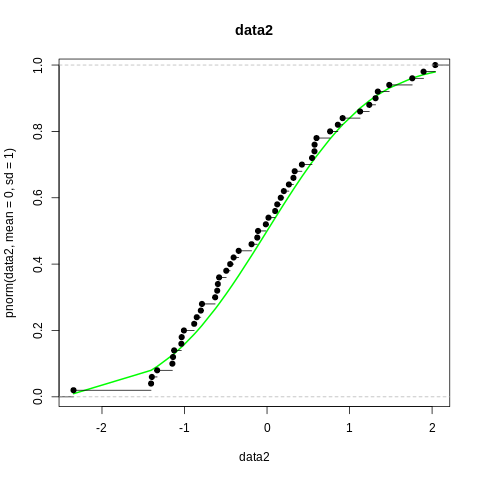

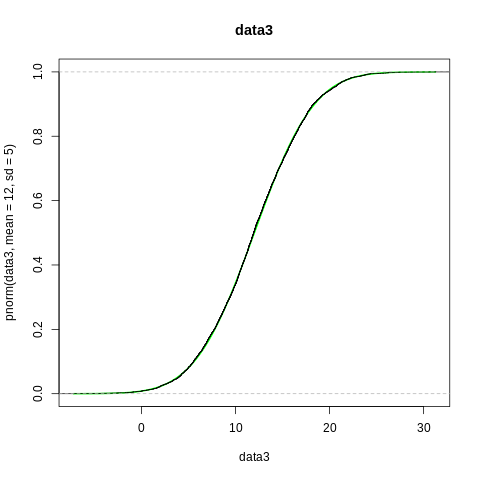

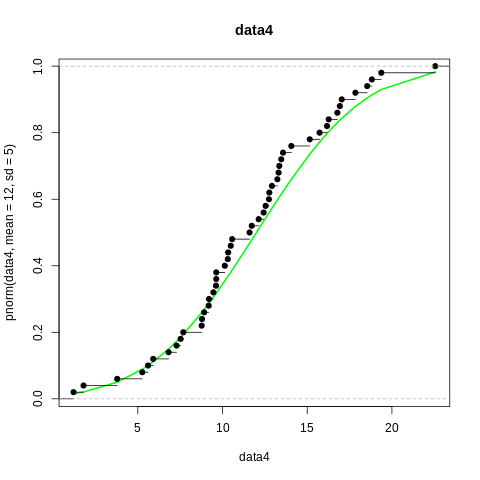

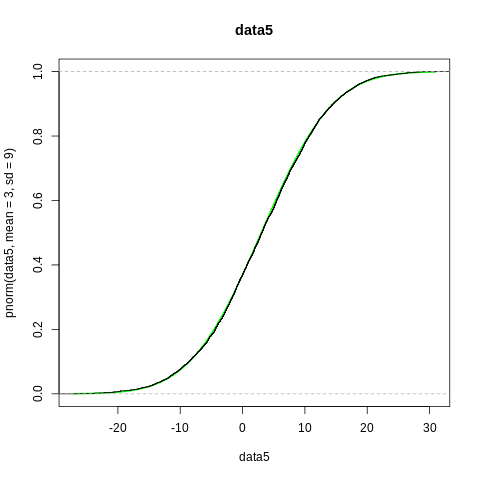

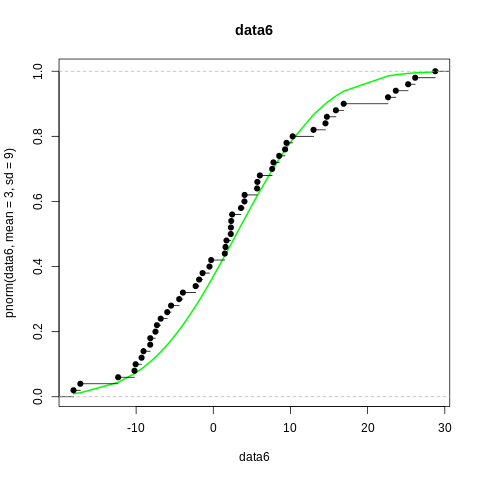

In [35]:
%%R

data1 = sort(data1)
plot(data1,  pnorm(data1, mean = 0, sd = 1), type = "l", col = "green", lwd = 2, main = 'data1')
plot(ecdf(data1), add = TRUE)

data2 = sort(data2)
plot(data2,  pnorm(data2, mean = 0, sd = 1), type = "l", col = "green", lwd = 2, main = 'data2')
plot(ecdf(data2), add = TRUE)

data3 = sort(data3)
plot(data3,  pnorm(data3, mean = 12, sd = 5), type = "l", col = "green", lwd = 2, main = 'data3')
plot(ecdf(data3), add = TRUE)

data4 = sort(data4)
plot(data4,  pnorm(data4, mean = 12, sd = 5), type = "l", col = "green", lwd = 2, main = 'data4')
plot(ecdf(data4), add = TRUE)

data5 = sort(data5)
plot(data5,  pnorm(data5, mean = 3, sd = 9), type = "l", col = "green", lwd = 2, main = 'data5')
plot(ecdf(data5), add = TRUE)

data6 = sort(data6)
plot(data6,  pnorm(data6, mean = 3, sd = 9), type = "l", col = "green", lwd = 2, main = 'data6')
plot(ecdf(data6), add = TRUE)


Из графиков видна сильная зависимость точности графика от объёма выборки. Чем больше выборка, тем лучше график совпадает с эмперической функцией распределения.

Квантили

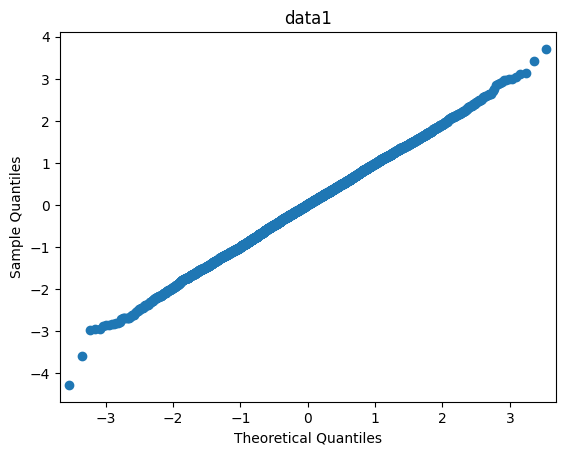

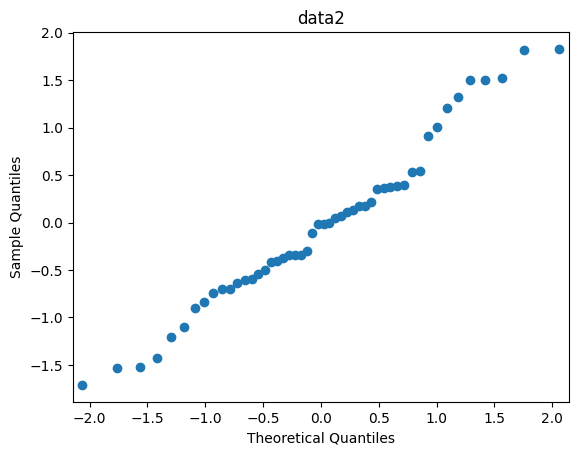

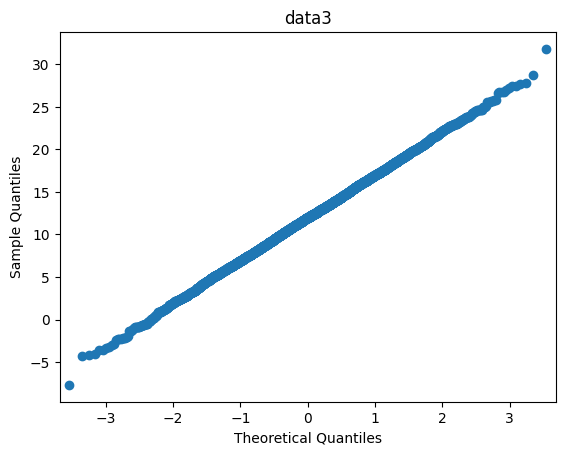

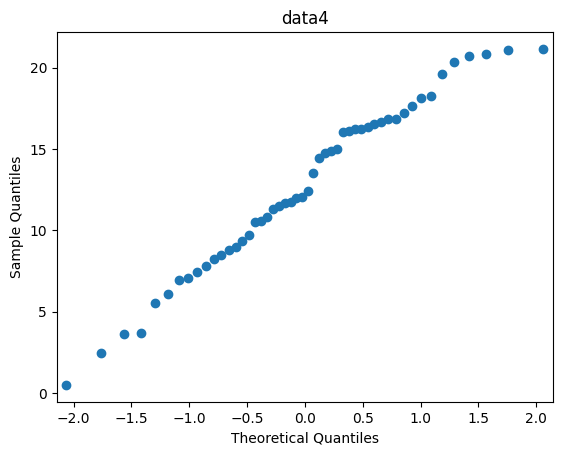

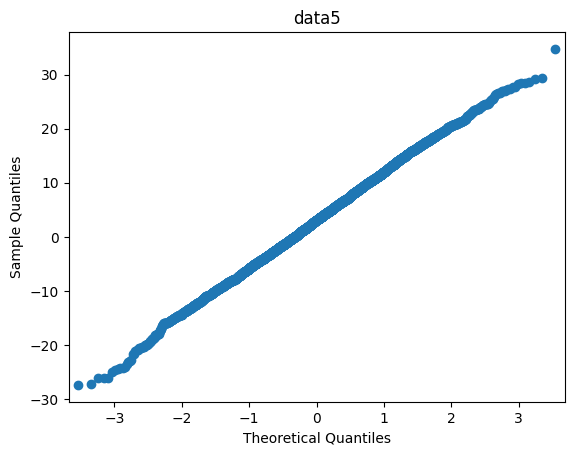

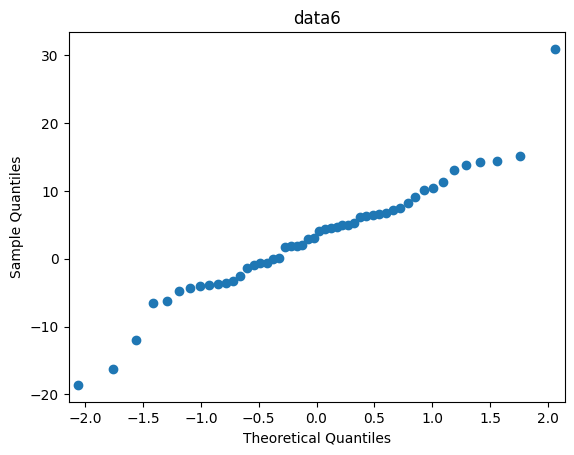

In [36]:
import statsmodels.api as stm

stm.qqplot(data1)
plt.title('data1')
plt.show()

stm.qqplot(data2)
plt.title('data2')
plt.show()

stm.qqplot(data3)
plt.title('data3')
plt.show()

stm.qqplot(data4)
plt.title('data4')
plt.show()

stm.qqplot(data5)
plt.title('data5')
plt.show()

stm.qqplot(data6)
plt.title('data6')
plt.show()


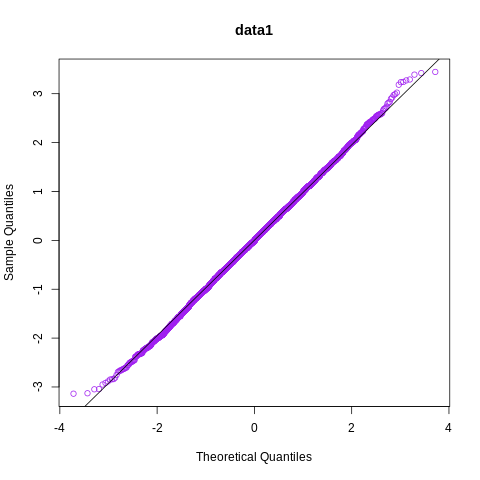

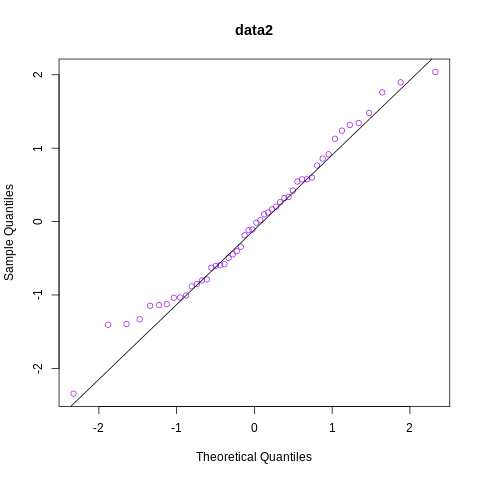

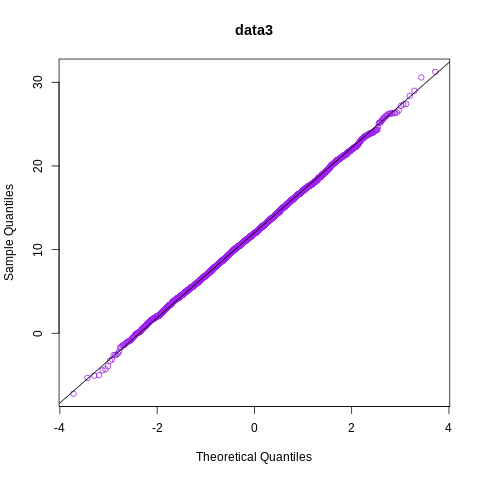

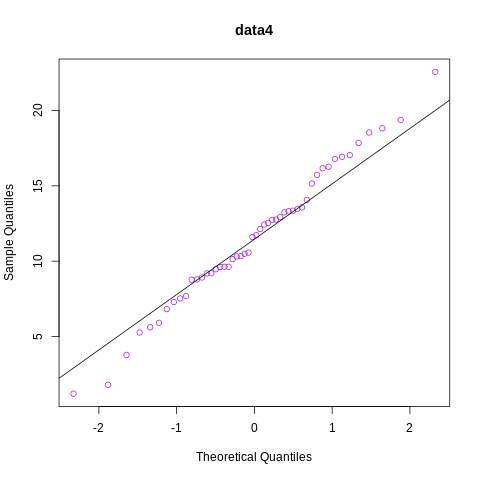

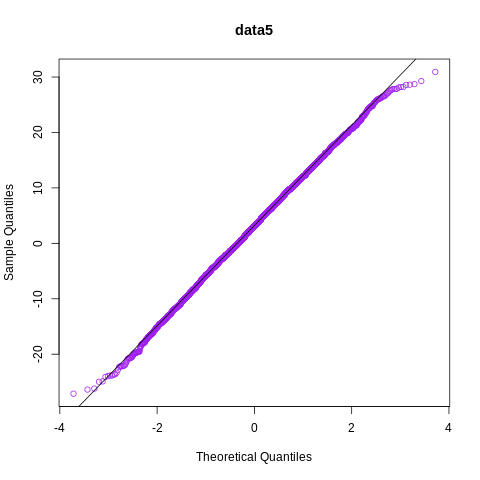

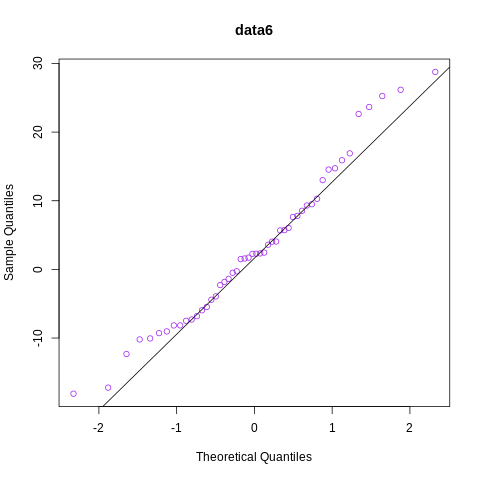

In [37]:
%%R

qqnorm(data1, col = 'purple', main = 'data1')
qqline(data1)

qqnorm(data2, col = 'purple', main = 'data2')
qqline(data2)

qqnorm(data3, col = 'purple', main = 'data3')
qqline(data3)

qqnorm(data4, col = 'purple', main = 'data4')
qqline(data4)

qqnorm(data5, col = 'purple', main = 'data5')
qqline(data5)

qqnorm(data6, col = 'purple', main = 'data6')
qqline(data6)


Чем больше выборка, тем сильнее данные нормальны.

Метод огибающих

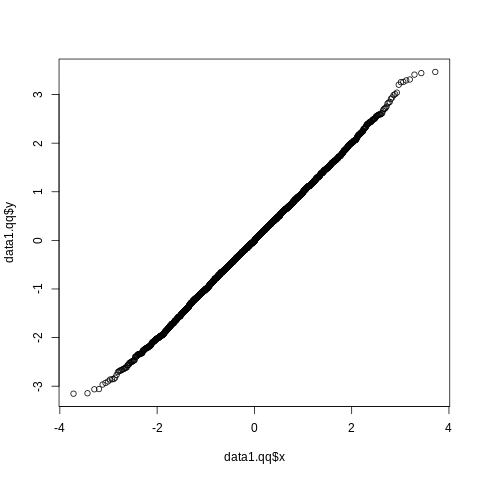

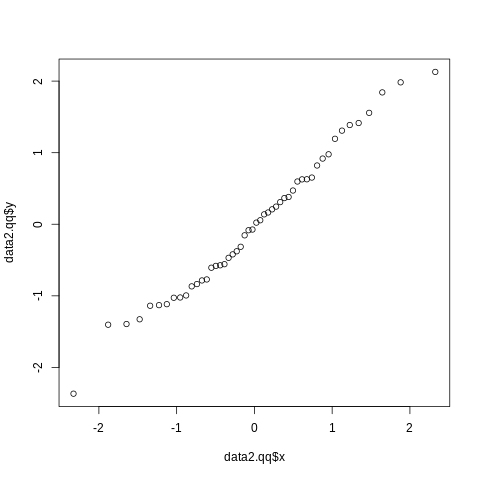

In [128]:
%%R

z <- (data1 - mean(data1))/sqrt(var(data1))
data1.qq <- qqnorm(z, plot.it = FALSE)
data1.qq <- lapply(data1.qq, sort)
plot(data1.qq)

z <- (data2 - mean(data2))/sqrt(var(data2))
data2.qq <- qqnorm(z, plot.it = FALSE)
data2.qq <- lapply(data2.qq, sort)
plot(data2.qq)




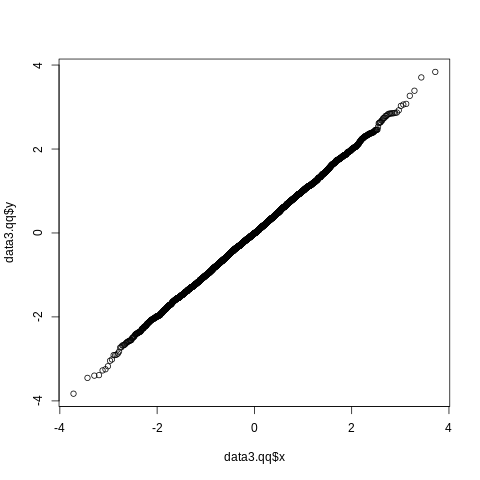

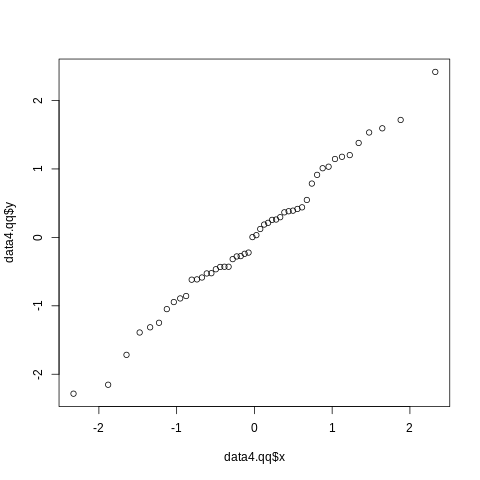

In [127]:
%%R

z <- (data3 - mean(data3))/sqrt(var(data3))
data3.qq <- qqnorm(z, plot.it = FALSE)
data3.qq <- lapply(data3.qq, sort)
plot(data3.qq)

z <- (data4 - mean(data4))/sqrt(var(data4))
data4.qq <- qqnorm(z, plot.it = FALSE)
data4.qq <- lapply(data4.qq, sort)
plot(data4.qq)

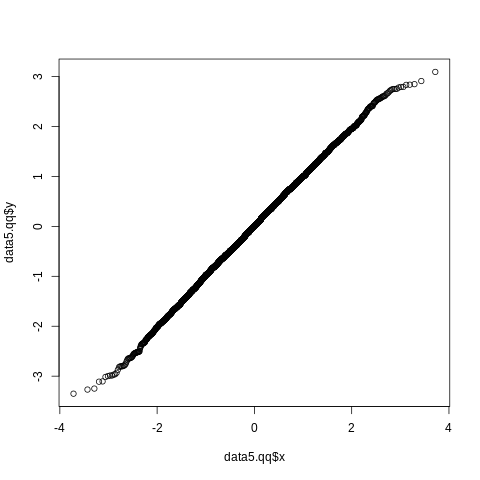

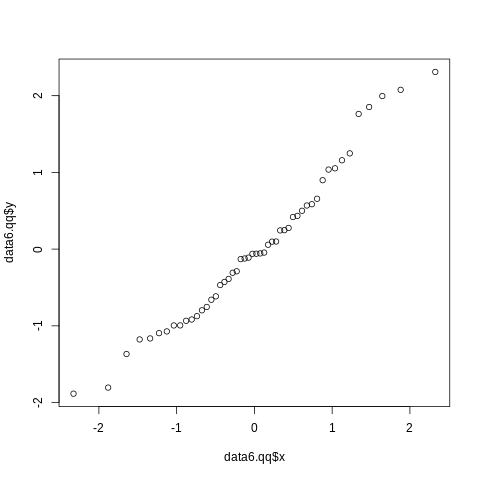

In [126]:
%%R

z <- (data5 - mean(data5))/sqrt(var(data5))
data5.qq <- qqnorm(z, plot.it = FALSE)
data5.qq <- lapply(data5.qq, sort)
plot(data5.qq)

z <- (data6 - mean(data6))/sqrt(var(data6))
data6.qq <- qqnorm(z, plot.it = FALSE)
data6.qq <- lapply(data6.qq, sort)
plot(data6.qq)

Чем больше данных, тем сильнее график становится сильнее на линейную функцию.

**Стандартные процедуры проверки гипотез о нормальности**

H0: распределение соответствует стандартному нормальному распределению

H1: распределение не соответствует стандартному нормальному распределению



*Критерий Колмогорова-Смирнова:*

По критерию сравниваются эмпирическая функция распределения переменной с заданным теоретическим распределением (в нашем случае нормальным).


In [38]:
#python

print("data1", kstest(data1, 'norm'))
print("data2", kstest(data2, 'norm'))
print("data3", kstest(data3, 'norm'))
print("data4", kstest(data4, 'norm'))
print("data5", kstest(data5, 'norm'))
print("data6", kstest(data6, 'norm'))

data1 KstestResult(statistic=0.012113082114864893, pvalue=0.45194276658006927, statistic_location=-0.3051838075407349, statistic_sign=-1)
data2 KstestResult(statistic=0.12818920232062703, pvalue=0.3535479528484018, statistic_location=0.3902138721148143, statistic_sign=1)
data3 KstestResult(statistic=0.9631693279964592, pvalue=0.0, statistic_location=2.547128468263965, statistic_sign=-1)
data4 KstestResult(statistic=0.9733089036384233, pvalue=4.1624655851140146e-79, statistic_location=2.4734329114905496, statistic_sign=-1)
data5 KstestResult(statistic=0.52361589386474, pvalue=0.0, statistic_location=2.1498357120178717, statistic_sign=-1)
data6 KstestResult(statistic=0.5825609206922813, pvalue=1.1962324944284326e-16, statistic_location=1.781209951073405, statistic_sign=-1)


In [39]:
%%R

print(ks.test(data1, "pnorm"))
print(ks.test(data2, "pnorm"))
print(ks.test(data3, "pnorm"))
print(ks.test(data4, "pnorm"))
print(ks.test(data5, "pnorm"))
print(ks.test(data6, "pnorm"))


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  data1
D = 0.007109, p-value = 0.9622
alternative hypothesis: two-sided


	Exact one-sample Kolmogorov-Smirnov test

data:  data2
D = 0.079314, p-value = 0.8869
alternative hypothesis: two-sided


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  data3
D = 0.96588, p-value < 2.2e-16
alternative hypothesis: two-sided


	Exact one-sample Kolmogorov-Smirnov test

data:  data4
D = 0.95992, p-value = 8.882e-16
alternative hypothesis: two-sided


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  data5
D = 0.52659, p-value < 2.2e-16
alternative hypothesis: two-sided


	Exact one-sample Kolmogorov-Smirnov test

data:  data6
D = 0.512, p-value = 1.092e-12
alternative hypothesis: two-sided



Значение p-value оказалось больше 0.05 на первом и втором тестах, откуда делаем вывод, что data1 и data2 соответствуют стандартному нормальному распределению. Что соответствует построению.

*Критерий Шапиро-Уилка:*

Критерий используется для проверки на принадлежность наблюдаемой выборки нормальной генеральной совокупности.

In [40]:
#python

print("data1", shapiro(data1))
print("data2", shapiro(data2))
print("data3", shapiro(data3))
print("data4", shapiro(data4))
print("data5", shapiro(data5))
print("data6", shapiro(data6))

data1 ShapiroResult(statistic=0.9996926784515381, pvalue=0.6844828724861145)
data2 ShapiroResult(statistic=0.9702317118644714, pvalue=0.23651853203773499)
data3 ShapiroResult(statistic=0.9998640418052673, pvalue=0.9956117272377014)
data4 ShapiroResult(statistic=0.9704487323760986, pvalue=0.24135710299015045)
data5 ShapiroResult(statistic=0.9993299245834351, pvalue=0.058811869472265244)
data6 ShapiroResult(statistic=0.9622690677642822, pvalue=0.11065346747636795)


In [41]:
%%R

print(shapiro.test(data1))
print(shapiro.test(data2))
print(shapiro.test(data3))
print(shapiro.test(data4))
print(shapiro.test(data5))
print(shapiro.test(data6))


	Shapiro-Wilk normality test

data:  data1
W = 0.9996, p-value = 0.4162


	Shapiro-Wilk normality test

data:  data2
W = 0.98249, p-value = 0.6605


	Shapiro-Wilk normality test

data:  data3
W = 0.99977, p-value = 0.8892


	Shapiro-Wilk normality test

data:  data4
W = 0.99094, p-value = 0.9656


	Shapiro-Wilk normality test

data:  data5
W = 0.99933, p-value = 0.06096


	Shapiro-Wilk normality test

data:  data6
W = 0.97054, p-value = 0.2433



Так как во всех тестах значение p-value больше 0.05, это значит, что все данные имеют нормальное распределение.
Что соответствует изначальной генерации данных.

*Критерий Андерсона-Дарлинга:*



Критерий предназначен для проверки простых гипотез о принадлежности выборки некоторому закону распределения с известными параметрами.

In [42]:
#python

print("data1", anderson(data1))
print("data2", anderson(data2))
print("data3", anderson(data3))
print("data4", anderson(data4))
print("data5", anderson(data5))
print("data6", anderson(data6))

data1 AndersonResult(statistic=0.35387421351242665, critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.002322987770453432, scale=0.9756774429795403)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
data2 AndersonResult(statistic=0.46023773796736833, critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-0.029283019557814507, scale=0.8794584198613428)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
data3 AndersonResult(statistic=0.1848390250806915, critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=11.937421252918172, scale=5.034831643440555)
 success: True
 message: '`anderson` successfully fit the distribution t

Поскольку статистика меньше, чем критические значения во всех тестах, данные распределены нормально.

In [43]:
%%R

print(ad.test(data1))
print(ad.test(data2))
print(ad.test(data3))
print(ad.test(data4))
print(ad.test(data5))
print(ad.test(data6))


	Anderson-Darling normality test

data:  data1
A = 0.20149, p-value = 0.8809


	Anderson-Darling normality test

data:  data2
A = 0.285, p-value = 0.6139


	Anderson-Darling normality test

data:  data3
A = 0.3164, p-value = 0.5404


	Anderson-Darling normality test

data:  data4
A = 0.19983, p-value = 0.8776


	Anderson-Darling normality test

data:  data5
A = 0.4103, p-value = 0.3428


	Anderson-Darling normality test

data:  data6
A = 0.4404, p-value = 0.28



Во всех тестах p-value больше 0,05, что говорит о нормальности данных.

*Критерий Крамера фон Мизеса:*

Критерий говорит о принадлежности анализируемой выборки к полностью известному закону. При проверке простых гипотез критерий является свободным от распределения, то есть не зависит от вида закона, с которым проверяется согласие.

In [44]:
#python

print("data1", cramervonmises(data1, 'norm'))
print("data2", cramervonmises(data2, 'norm'))
print("data3", cramervonmises(data3, 'norm'))
print("data4", cramervonmises(data4, 'norm'))
print("data5", cramervonmises(data5, 'norm'))
print("data6", cramervonmises(data5, 'norm'))

data1 CramerVonMisesResult(statistic=0.14933688295145028, pvalue=0.3916128675029509)
data2 CramerVonMisesResult(statistic=0.11627156556631324, pvalue=0.5123844968178961)
data3 CramerVonMisesResult(statistic=1600.230342624437, pvalue=3.148937038899291e-07)
data4 CramerVonMisesResult(statistic=16.13886468590996, pvalue=6.40463415635395e-09)
data5 CramerVonMisesResult(statistic=389.71895137302516, pvalue=1.4393812597379707e-07)
data6 CramerVonMisesResult(statistic=389.71895137302516, pvalue=1.4393812597379707e-07)


In [45]:
%%R

print(cvm.test(data1))
print(cvm.test(data2))
print(cvm.test(data3))
print(cvm.test(data4))
print(cvm.test(data5))
print(cvm.test(data6))


	Cramer-von Mises normality test

data:  data1
W = 0.02338, p-value = 0.9313


	Cramer-von Mises normality test

data:  data2
W = 0.038579, p-value = 0.7011


	Cramer-von Mises normality test

data:  data3
W = 0.051858, p-value = 0.4845


	Cramer-von Mises normality test

data:  data4
W = 0.034063, p-value = 0.7812


	Cramer-von Mises normality test

data:  data5
W = 0.061473, p-value = 0.3618


	Cramer-von Mises normality test

data:  data6
W = 0.060204, p-value = 0.3692



Во всех тестах p-value больше 0,05, что говорит о нормальности данных.

*Критерий Колмогорова-Смирнова в модификации Лиллиефорса и Шапиро-Франсия:*

Критерий используется, когда параметры нормального распределения (математическое ожидание и дисперсия) априори неизвестны.

In [46]:
from statsmodels.stats.diagnostic import lilliefors

print("data1", lilliefors(data1, 'norm'))
print("data2", lilliefors(data2, 'norm'))
print("data3", lilliefors(data3, 'norm'))
print("data4", lilliefors(data4, 'norm'))
print("data5", lilliefors(data5, 'norm'))
print("data6", lilliefors(data6, 'norm'))

data1 (0.008352303509780834, 0.545657446814805)
data2 (0.09668299378919198, 0.2859649996368004)
data3 (0.006714627605553969, 0.8482273748529464)
data4 (0.11625986606313488, 0.08874570159934975)
data5 (0.01040835405113133, 0.21971015784876502)
data6 (0.07848615452762009, 0.6107459537681887)


Второе значение в скобках соответствует p-value.

In [47]:
%%R
print(lillie.test(data1))
print(lillie.test(data2))
print(lillie.test(data3))
print(lillie.test(data4))
print(lillie.test(data5))
print(lillie.test(data6))


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data1
D = 0.0061291, p-value = 0.9206


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data2
D = 0.07156, p-value = 0.7537


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data3
D = 0.0088685, p-value = 0.4448


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data4
D = 0.07043, p-value = 0.7746


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data5
D = 0.0097429, p-value = 0.2987


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data6
D = 0.080541, p-value = 0.5768



Во всех тестах p-value больше 0.05, следовательно, данные распределены нормально.

**6. Продемонстрировать пример анализа данных с помощью графиков квантилей, метода огибающих, а также стандартных процедур проверки гипотез о нормальности. Рассмотреть выборки малого и умеренного объемов.**

За умеренную выборку возьмъём изначальную таблицу, так как она содержит 1549 значений. За Малую выборку возьмём данные за 1998 год - 81 значение.

In [48]:
#python
data_frame[data_frame['year'] == 1998]

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.10
1,1998,Altai Krai,2.7,19.2,11.3,1.1,0.10
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.40
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.30
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.20
...,...,...,...,...,...,...,...
76,1998,Chuvash Republic,1.6,20.9,8.8,0.8,0.02
77,1998,Chukotka Autonomous Okrug,0.3,1.8,4.6,0.6,0.10
78,1998,Sakha (Yakutia) Republic,1.7,16.7,18.9,1.4,0.20
79,1998,Yamalo-Nenets Autonomous Okrug,3.0,23.8,11.5,0.8,0.30


Выделим столбец, которые мы будем использовать для анализа в отдельные переменные. Будем использовать данные о продажах вина.

In [49]:
#python

temp = data_frame[data_frame['year'] == 1998].wine
temps = data_frame.wine


In [50]:
%%R

temp = filter_data(data_frame, 'year', '1998')
temp <- temp$wine
temps <- data_frame$wine

Графики квантилей:

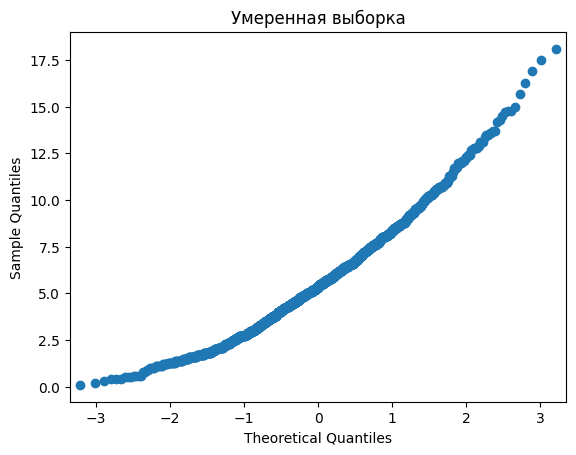

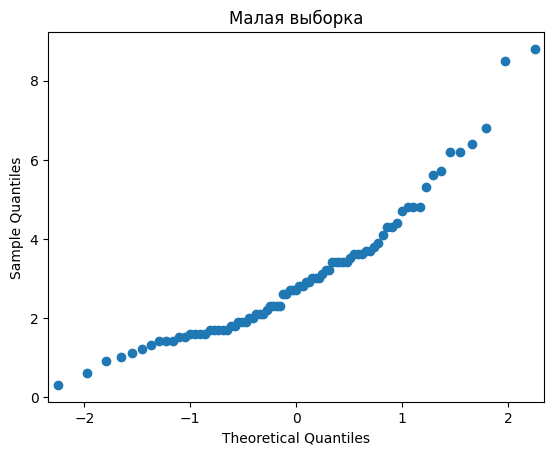

In [118]:
import statsmodels.api as stm

stm.qqplot(temps)
plt.title('Умеренная выборка')
stm.qqplot(temp)
plt.title('Малая выборка')
plt.show()

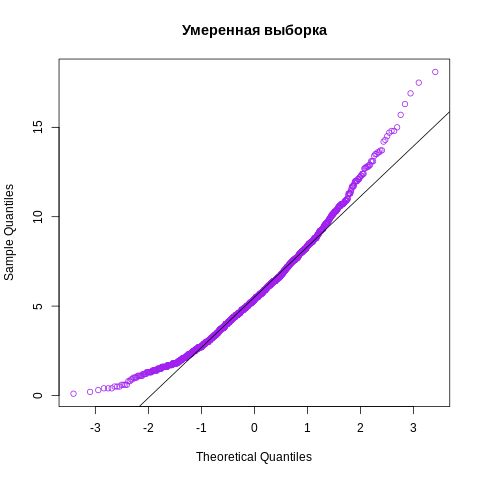

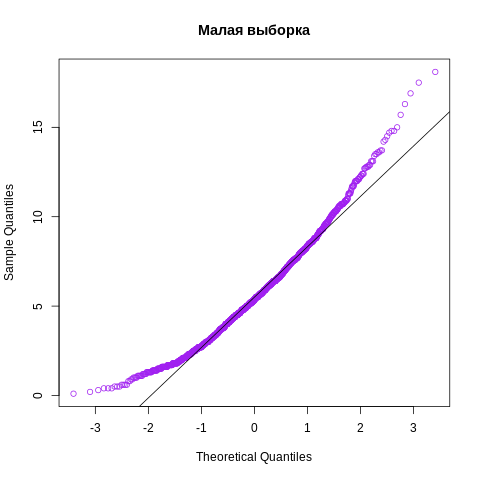

In [52]:
%%R

qqnorm(temps, col = 'purple', main = 'Умеренная выборка')
qqline(temps)

qqnorm(temps, col = 'purple', main = 'Малая выборка')
qqline(temps)

Чем больше объём, тем сильнее график становится похожим на линейный.

Метод огибающих

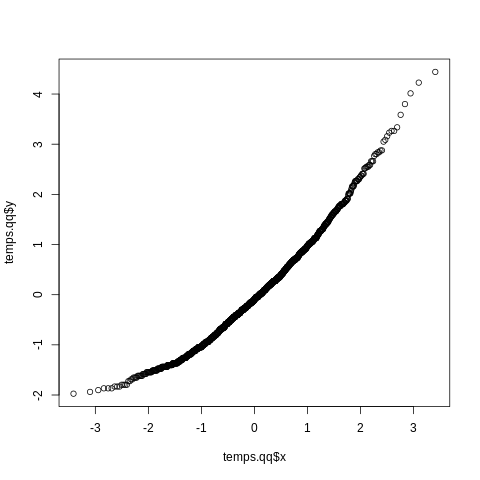

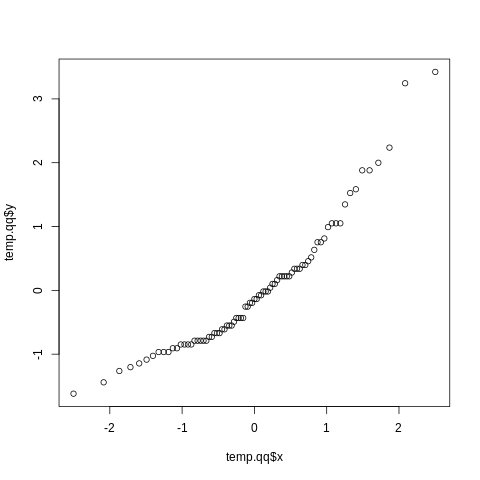

In [130]:
%%R
z <- (temps - mean(temps))/sqrt(var(temps))
temps.qq <- qqnorm(z, plot.it = FALSE)
temps.qq <- lapply(temps.qq, sort)
plot(temps.qq)

z <- (temp - mean(temp))/sqrt(var(temp))
temp.qq <- qqnorm(z, plot.it = FALSE)
temp.qq <- lapply(temp.qq, sort)
plot(temp.qq)

Чем больше объём выборки, тем сильнее график становится похожим на линейный.

Стандартные процедуры проверки гипотез о нормальности:

In [53]:
#python
print("Умеренная выборка:")
print(kstest(temps, 'norm'))
print(shapiro(temps))
print(anderson(temps))
print(cramervonmises(temps, 'norm'))
print(lilliefors(temps, 'norm'))

print("Малая выборка:")
print(kstest(temp, 'norm'))
print(shapiro(temp))
print(anderson(temp))
print(cramervonmises(temp, 'norm'))
print(lilliefors(temp, 'norm'))

Умеренная выборка:
KstestResult(statistic=0.9051748851887571, pvalue=0.0, statistic_location=1.6, statistic_sign=-1)
ShapiroResult(statistic=0.970331072807312, pvalue=2.5323585205384207e-17)
AndersonResult(statistic=7.970998676193403, critical_values=array([0.575, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=5.638140735958682, scale=2.8063684780235403)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
CramerVonMisesResult(statistic=492.29930834671336, pvalue=1.387358968818475e-07)
(0.04956330822703481, 0.0009999999999998899)
Малая выборка:
KstestResult(statistic=0.8328235876798091, pvalue=5.218155386930133e-63, statistic_location=1.4, statistic_sign=-1)
ShapiroResult(statistic=0.9097482562065125, pvalue=2.8963790100533515e-05)
AndersonResult(statistic=1.9592685701252037, critical_values=array([0.551, 0.627, 0.753, 0.878, 1.044]), significance_level=array([15. , 10. ,  5. , 

In [54]:
%%R

print("Умеренная выборка:")
print(ks.test(temps, "pnorm"))
print(shapiro.test(temps))
print(ad.test(temps))
print(cvm.test(temps))
print(lillie.test(temps))


print("Малая выборка:")
print(ks.test(temp, "pnorm"))
print(shapiro.test(temp))
print(ad.test(temp))
print(cvm.test(temp))
print(lillie.test(temp))


[1] "Умеренная выборка:"

	Asymptotic one-sample Kolmogorov-Smirnov test

data:  temps
D = 0.90517, p-value < 2.2e-16
alternative hypothesis: two-sided


	Shapiro-Wilk normality test

data:  temps
W = 0.97034, p-value < 2.2e-16


	Anderson-Darling normality test

data:  temps
A = 7.9703, p-value < 2.2e-16


	Cramer-von Mises normality test

data:  temps
W = 1.1074, p-value = 7.37e-10


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  temps
D = 0.049598, p-value = 1.623e-09

[1] "Малая выборка:"

	Asymptotic one-sample Kolmogorov-Smirnov test

data:  temp
D = 0.83282, p-value < 2.2e-16
alternative hypothesis: two-sided


	Shapiro-Wilk normality test

data:  temp
W = 0.91124, p-value = 3.379e-05


	Anderson-Darling normality test

data:  temp
A = 1.9103, p-value = 6.457e-05


	Cramer-von Mises normality test

data:  temp
W = 0.29818, p-value = 0.000333


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  temp
D = 0.11187, p-value = 0.01387



***Вывод:*** по критериям для малой выборки наблюдается следующее: p-value меньше 0.05, что значит, что мы отвергаем гипотезу о нормальном распределении данных. По полученной из критерия Андерсона-Дарлинга информации эта гипотеза также отвергается, так как на всех тестах тестовая статистика принимает значения большие, нежели критические значения. Таким образом, мы отвергаем гипотезу о нормальном распределеннии данных. Аналогичная ситуация и с данными из умеренной выборки - они не распределены нормально.

In [192]:
%%shell
jupyter nbconvert --to html /content/prac_part1-6.ipynb

[NbConvertApp] Converting notebook /content/prac_part1-6.ipynb to html
[NbConvertApp] Writing 2416534 bytes to /content/prac_part1-6.html
